In [2]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Tilt_tolerance_0.1deg_precision.csv','r')
rdr = csv.reader(file)
prompt = float(0)
var = [0,-0.002,0.002] #Put the proper set value in front. This may be Rrod, Hrod, Tilt angle etc. Write all the cases.
dt = np.zeros((len(var),9), dtype=object) # Angle / Freq / C / Gtot / Grod
data = dict(zip(var,dt))

for line in rdr:
   for v in var:
      if(float(line[1]) == float(v) and float(line[4])>0.05): 
         #print(float(line[0]))
         data[v][0] = np.append(data[v][0],float(line[0]))
         data[v][1] = np.append(data[v][1],float(line[2]))
         data[v][2] = np.append(data[v][2],float(line[4]))
         data[v][3] = np.append(data[v][3],float(line[-2]))
         data[v][4] = np.append(data[v][4],float(line[-1]))
for v in var:
    for i in range (5):
      data[v][i] = data[v][i][1:]
print(data[0])

[array([100. , 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8,
        100.9, 101. , 101.1, 101.2, 101.3, 101.4, 101.5, 101.6, 101.7,
        101.8, 101.9, 102. , 102.1, 102.2, 102.3, 102.4, 102.5, 102.6,
        102.7, 102.8, 102.9, 103. , 103.1, 103.2, 103.3, 103.4, 103.5,
        103.6, 103.7, 103.8, 103.9, 104. , 104.1, 104.2, 104.3, 104.4,
        104.5, 104.6, 104.7, 104.8, 104.9, 105. , 105.1, 105.2, 105.3,
        105.4, 105.5, 105.5, 105.6, 105.7, 105.8, 105.9, 106. , 106.1,
        106.2, 106.3, 106.4, 106.5, 106.6, 106.7, 106.8, 106.9, 107. ,
        107.1, 107.2, 107.3, 107.4, 107.5, 107.6, 107.7, 107.8, 107.9,
        108. , 108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7, 108.8,
        108.9, 109. , 109.1, 109.2, 109.3, 109.4, 109.5, 109.6, 109.7,
        109.8, 109.9, 110. ])
 array([1.7506, 1.7509, 1.7512, 1.7515, 1.7517, 1.7521, 1.7523, 1.7526,
        1.7528, 1.7532, 1.7534, 1.7537, 1.754 , 1.7542, 1.7545, 1.7548,
        1.7551, 1.7554, 1.7556, 1.7559, 1.756

In [3]:
def cube(x,a,b,c,d):
   return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def quad(x,a,b,c):
   return a*np.power(x,2)+b*np.power(x,1)+c

if (type(data[v][-2])==int):
   for v in var:
      x = data[v][1] #frequency
      y1 = data[v][2] #C
      y2 = data[v][3] #Qtot
      y3 = data[v][4] #Qrod
      popt_C, pcov_C = curve_fit(cube,x,y1)
      popt_Qtot, pcov_Qtot = curve_fit(quad,x,y2)
      popt_Qrod, pcov_Qrod = curve_fit(quad,x,y3)
      data[v][-3] = np.append(data[v][-3],popt_C)
      data[v][-3] = data[v][-3][1:]
      data[v][-2] = np.append(data[v][-2],popt_Qtot)
      data[v][-2] = data[v][-2][1:]
      data[v][-1] = np.append(data[v][-1],popt_Qrod)
      data[v][-1] = data[v][-1][1:]
#print(data[0])

Text(0.5, 1.0, 'Rod Angle v. Frequency')

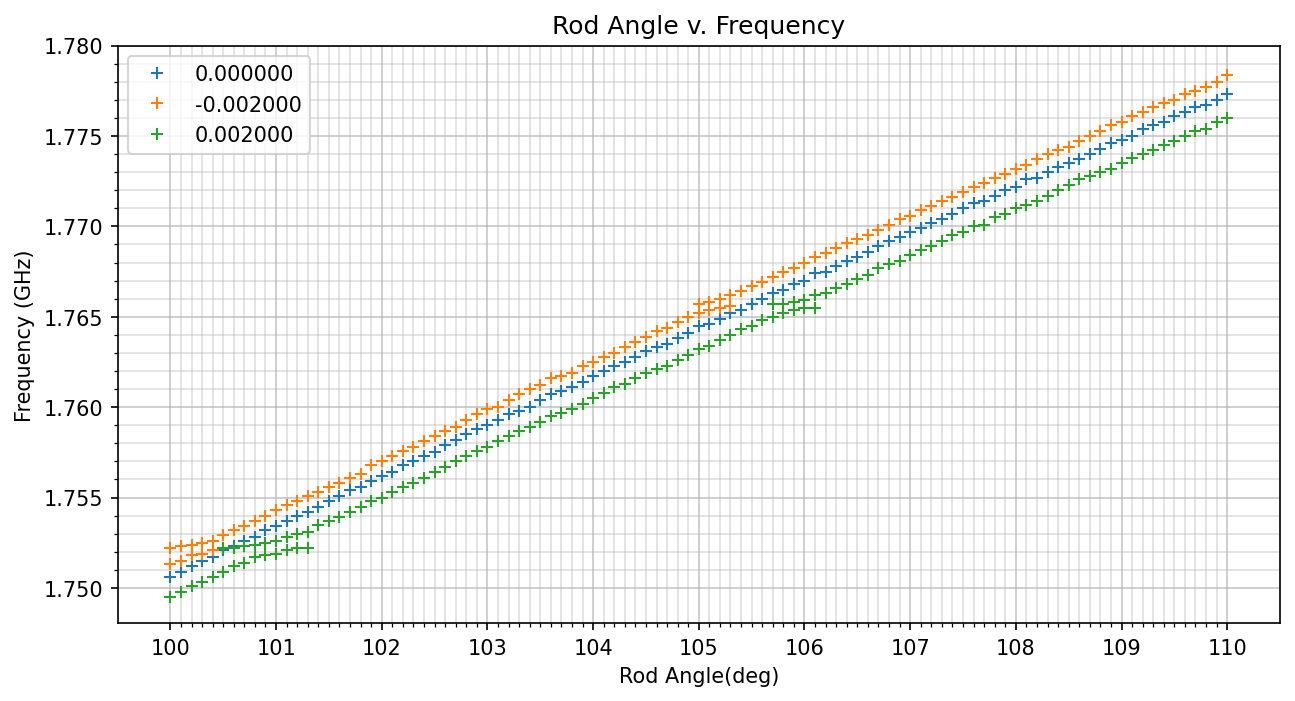

In [4]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
for v in var:
   angle = data[v][0]
   freq = data[v][1]
   label = '%f' %v
   axs.plot(angle,freq,marker='+',linestyle='None',label=label)
axs.legend()
axs.set_xticks(np.arange(100,111,1))
axs.set_xticks(np.arange(100,110,0.1),minor=True)
axs.set_yticks(np.arange(1.750,1.780,0.005))
axs.set_yticks(np.arange(1.750,1.780,0.001),minor=True)
axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)
axs.set_xlabel("Rod Angle(deg)")
axs.set_ylabel("Frequency (GHz)")
axs.set_title("Rod Angle v. Frequency")

Text(0.5, 1.0, 'Rotation Angle v. Frequency (Radial Tilt in mm)')

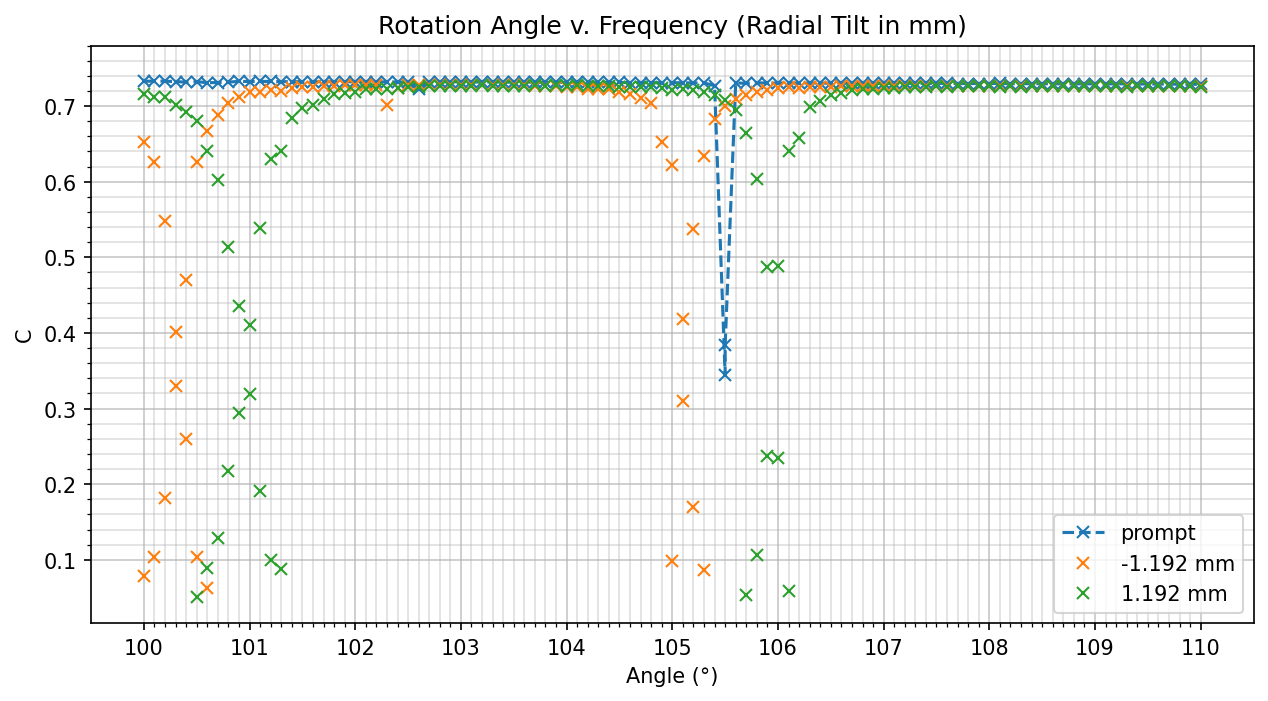

In [5]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][0] # freq of prompt
   pmt = data[v][2] # C of prompt
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)
   
#axs.set_xticks(np.arange(1.750,1.780,0.005))
#axs.set_xticks(np.arange(1.750,1.780,0.001),minor=True)
axs.set_xticks(np.arange(100,111,1))
axs.set_xticks(np.arange(100,110,0.1),minor=True)
axs.set_yticks(np.arange(0.1,0.8,0.1))
axs.set_yticks(np.arange(0.1,0.8,0.02),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('C')
axs.set_xlabel('Angle (°)')
axs.set_title('Rotation Angle v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_tot v. Frequency (Radial Tilt in mm)')

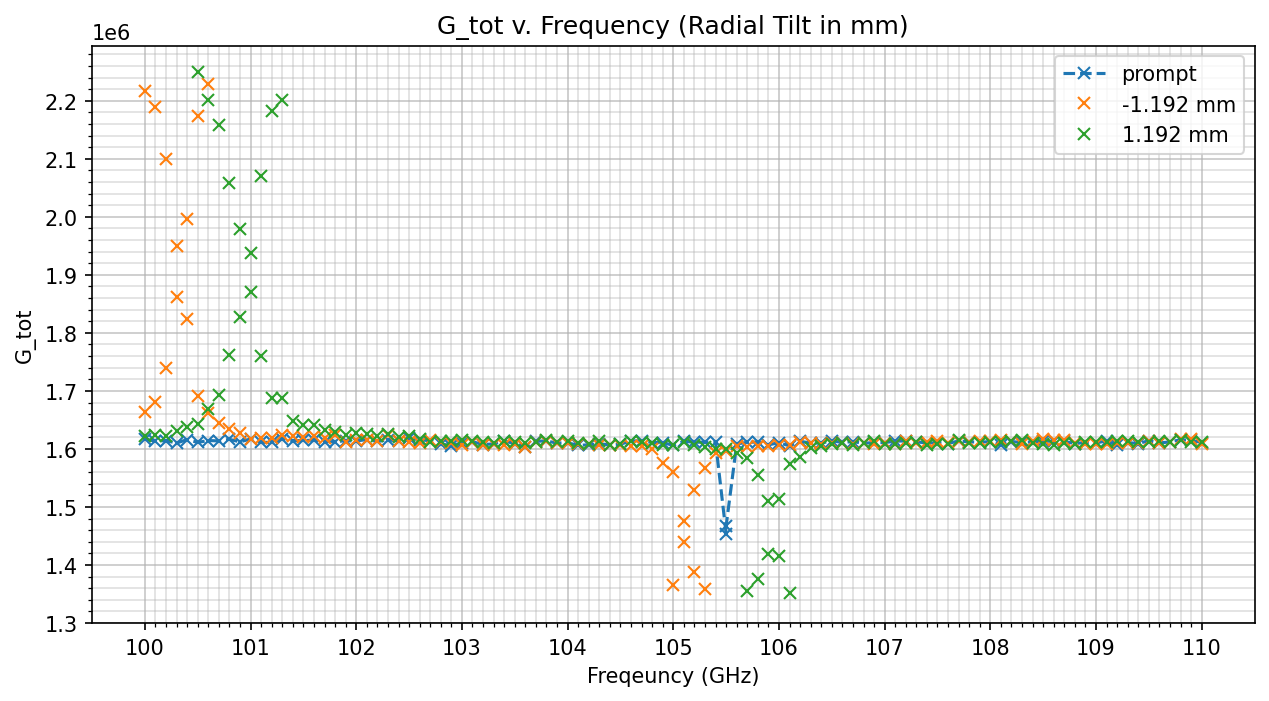

In [10]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][0] # freq of prompt
   pmt = data[v][3] # Qtot of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)

#axs.set_xticks(np.arange(1.750,1.780,0.005))
#axs.set_xticks(np.arange(1.750,1.780,0.001),minor=True)
axs.set_xticks(np.arange(100,111,1))
axs.set_xticks(np.arange(100,110,0.1),minor=True)
axs.set_yticks(np.arange(1.3e6,2.3e6,0.1e6))
axs.set_yticks(np.arange(1.3e6,2.3e6,0.02e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_tot')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_tot v. Frequency (Radial Tilt in mm)')

Text(0.5, 1.0, 'G_rod v. Frequency (Radial Tilt in mm)')

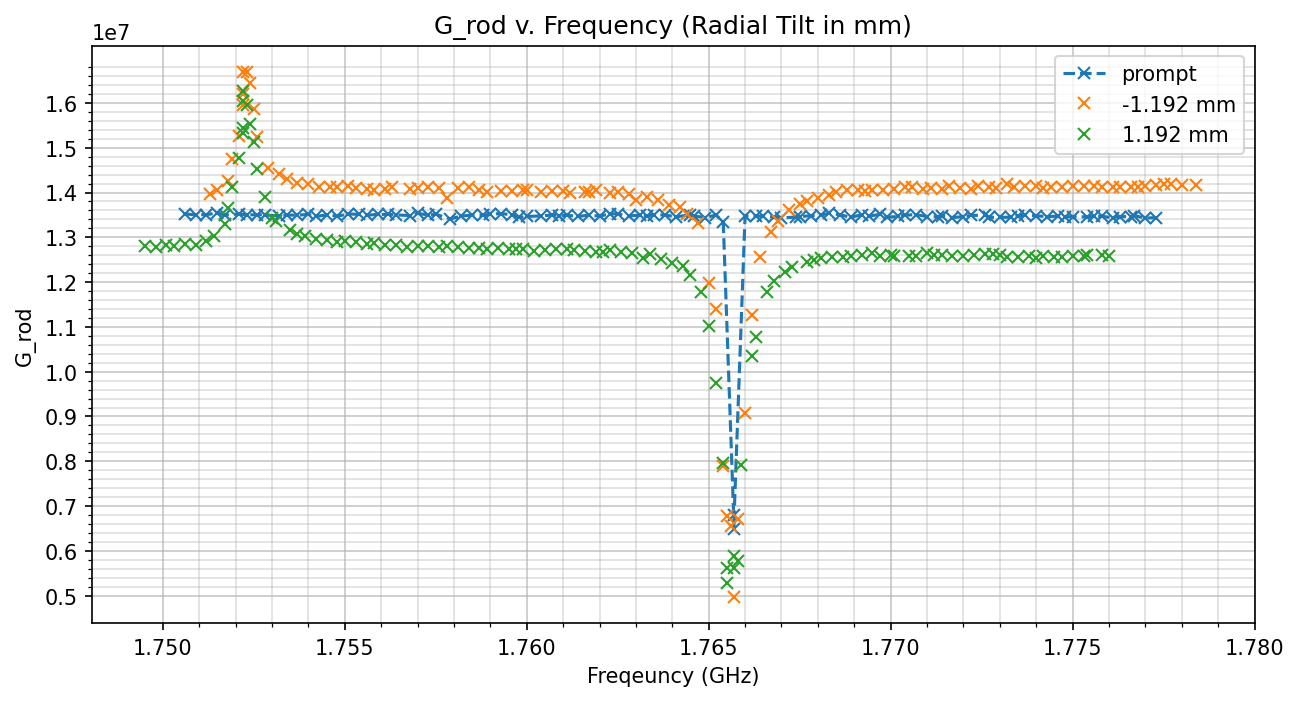

In [7]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   freq = data[v][1] # freq of prompt
   pmt = data[v][4] # Qrod of prompt
   label = '%f' % v
   if v == 0:
      label = 'prompt'
      axs.plot(freq,pmt,marker='x',linestyle = '--', label = label)
   else:
      label = '%.3f mm' %(v*596)
      axs.plot(freq,pmt,marker='x',linestyle='None',label=label)


axs.set_xticks(np.arange(1.750,1.780,0.005))
axs.set_xticks(np.arange(1.750,1.780,0.001),minor=True)

axs.set_yticks(np.arange(0.5e7,1.7e7,0.1e7))
axs.set_yticks(np.arange(0.5e7,1.7e7,0.2e6),minor=True)

axs.grid(which='major',alpha=0.7)
axs.grid(which="minor",alpha=0.4)

axs.legend()
axs.set_ylabel('G_rod')
axs.set_xlabel('Freqeuncy (GHz)')
axs.set_title('G_rod v. Frequency (Radial Tilt in mm)')